In [182]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import more_itertools as mit
import missingno as msno

In [183]:
house_data = pd.read_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/agg_data.csv")

In [184]:
house_data = house_data.drop(house_data[house_data['auxHeat1'].isnull()].index.tolist())

In [185]:
house_data.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.0,960.0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.5,1065.0
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.0,1575.0
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.0,1440.0
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.5,1680.0


In [186]:
house_data.count()

Month         3442
Day           3442
HourofDay     3442
T_ctrl        3442
T_stp_heat    3442
T_out         3442
RH_out        3442
Humidity      3442
fan           3442
auxHeat1      3442
dtype: int64

In [187]:
house_data.columns

Index(['Month', 'Day', 'HourofDay', 'T_ctrl', 'T_stp_heat', 'T_out', 'RH_out',
       'Humidity', 'fan', 'auxHeat1'],
      dtype='object')

In [188]:
house_data.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.0,960.0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.5,1065.0
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.0,1575.0
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.0,1440.0
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.5,1680.0


In [189]:
house_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [190]:
house_data.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [191]:
house_data.HourofDay.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [192]:
house_data.auxHeat1.unique()


array([ 960., 1065., 1575., 1440., 1680., 1260., 1230., 1470., 1800.,
       1200.,  735., 1350., 1080.,  630., 1380.,  945.,   75., 1530.,
       1455., 1050., 1590., 1935., 2010., 2040., 2070., 2130., 2115.,
       2790., 1545., 1395., 1305.,  750.,  855., 3120., 3600., 1605.,
       1815.,  795., 3180., 1650., 1320., 2685., 1995., 1335., 1950.,
       1125., 1365., 1710., 1635., 1425.,  840.,  720.,  525.,  480.,
        345.,  495., 2445.,  975., 1170.,  300., 3000.,  825.,  765.,
       1110., 1275.,  615., 2880., 3435.,   30.,  915.,   45.,  555.,
       2640., 2085., 3585., 1875.,  990.,  900., 2430., 2835., 3225.,
        180., 2745., 3330., 2925., 2205., 1410.,  675., 3510., 1485.,
       3300., 1830., 1215., 1020.,  585., 1140.,  780., 1755., 1770.,
        465., 1515., 3390., 2055., 1740., 1290., 3345., 1665., 3405.,
       2145., 2100., 2715.,  105., 2265., 2340., 2370., 3030., 2550.,
       2625., 3135., 3105., 3150., 3165., 2565., 2610., 1905.,  705.,
       2025., 1965.,

In [193]:
house_data.auxHeat1.min()

15.0

In [194]:
house_data.auxHeat1.max()

5250.0

In [195]:
house_data.count()

Month         3442
Day           3442
HourofDay     3442
T_ctrl        3442
T_stp_heat    3442
T_out         3442
RH_out        3442
Humidity      3442
fan           3442
auxHeat1      3442
dtype: int64

In [196]:
house_data.count()

Month         3442
Day           3442
HourofDay     3442
T_ctrl        3442
T_stp_heat    3442
T_out         3442
RH_out        3442
Humidity      3442
fan           3442
auxHeat1      3442
dtype: int64

[Text(0.5, 0, 'Target Variable Values')]

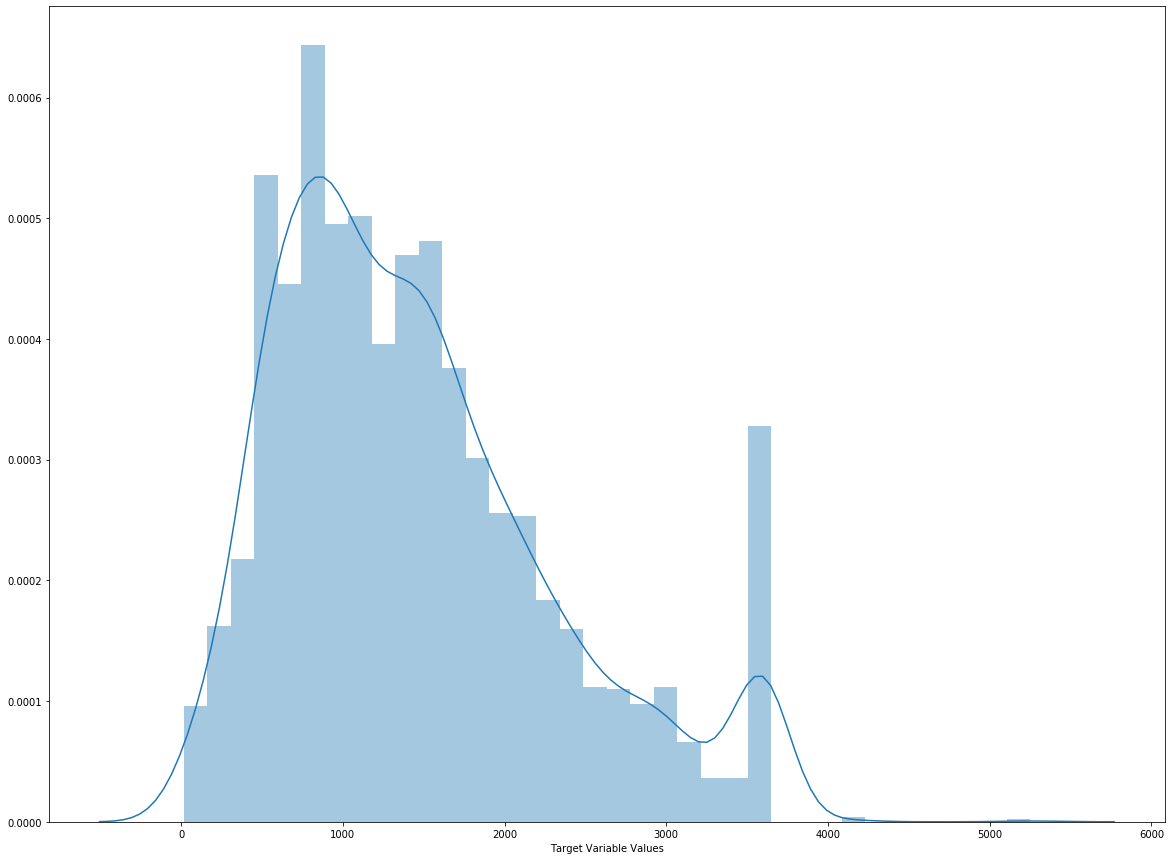

In [197]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_data.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [198]:
df = house_data
df.columns

Index(['Month', 'Day', 'HourofDay', 'T_ctrl', 'T_stp_heat', 'T_out', 'RH_out',
       'Humidity', 'fan', 'auxHeat1'],
      dtype='object')

In [199]:
df

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.00,960.0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.50,1065.0
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.00,1575.0
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.00,1440.0
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.50,1680.0
...,...,...,...,...,...,...,...,...,...,...
3437,12,31,17,70.0,70.0,33.0,72.0,35.583333,195.00,525.0
3438,12,31,18,70.0,70.0,33.0,72.0,33.083333,200.00,825.0
3439,12,31,21,70.0,70.0,29.0,76.0,31.416667,211.25,870.0
3440,12,31,22,70.0,70.0,30.0,72.5,31.166667,218.75,930.0


In [200]:
df['combined']=df['Month'].astype(str)+'_'+df['Day'].astype(str)+'_'+df['HourofDay'].astype(str)
df

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.00,960.0,1_1_0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.50,1065.0,1_1_1
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.00,1575.0,1_1_2
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.00,1440.0,1_1_3
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.50,1680.0,1_1_4
...,...,...,...,...,...,...,...,...,...,...,...
3437,12,31,17,70.0,70.0,33.0,72.0,35.583333,195.00,525.0,12_31_17
3438,12,31,18,70.0,70.0,33.0,72.0,33.083333,200.00,825.0,12_31_18
3439,12,31,21,70.0,70.0,29.0,76.0,31.416667,211.25,870.0,12_31_21
3440,12,31,22,70.0,70.0,30.0,72.5,31.166667,218.75,930.0,12_31_22


In [201]:
# def f(row):
#     if row['auxHeat1'] >= 0.0 and row['auxHeat1'] < 900.0:
#         val = 900.0
#     elif row['auxHeat1'] > 900.0 and row['auxHeat1'] < 1800.0:
#         val = 1800.0
#     elif row['auxHeat1'] > 1800.0 and row['auxHeat1'] < 2700.0:
#         val = 2700.00
#     else:
#         val = 3600.00
#     return val

In [202]:
#df['auxHeat1'] = df.apply(f, axis =1) 

In [203]:
df['auxHeat1'].unique()

array([ 960., 1065., 1575., 1440., 1680., 1260., 1230., 1470., 1800.,
       1200.,  735., 1350., 1080.,  630., 1380.,  945.,   75., 1530.,
       1455., 1050., 1590., 1935., 2010., 2040., 2070., 2130., 2115.,
       2790., 1545., 1395., 1305.,  750.,  855., 3120., 3600., 1605.,
       1815.,  795., 3180., 1650., 1320., 2685., 1995., 1335., 1950.,
       1125., 1365., 1710., 1635., 1425.,  840.,  720.,  525.,  480.,
        345.,  495., 2445.,  975., 1170.,  300., 3000.,  825.,  765.,
       1110., 1275.,  615., 2880., 3435.,   30.,  915.,   45.,  555.,
       2640., 2085., 3585., 1875.,  990.,  900., 2430., 2835., 3225.,
        180., 2745., 3330., 2925., 2205., 1410.,  675., 3510., 1485.,
       3300., 1830., 1215., 1020.,  585., 1140.,  780., 1755., 1770.,
        465., 1515., 3390., 2055., 1740., 1290., 3345., 1665., 3405.,
       2145., 2100., 2715.,  105., 2265., 2340., 2370., 3030., 2550.,
       2625., 3135., 3105., 3150., 3165., 2565., 2610., 1905.,  705.,
       2025., 1965.,

In [204]:
df.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.0,960.0,1_1_0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.5,1065.0,1_1_1
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.0,1575.0,1_1_2
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.0,1440.0,1_1_3
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.5,1680.0,1_1_4


In [205]:
numerical_vars = ['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity','fan']
predsc = StandardScaler()
predsc.fit(df[numerical_vars])
scalar_data = predsc.transform(df[numerical_vars])

In [206]:

y_auxHeat = df[['auxHeat1']].to_numpy()
targsc = StandardScaler()
targsc.fit(y_auxHeat)
y_auxHeat = targsc.transform(y_auxHeat)

In [207]:
y_auxHeat

array([[-0.57621365],
       [-0.45497808],
       [ 0.13388042],
       ...,
       [-0.68012986],
       [-0.61085239],
       [-0.55889429]])

In [208]:
s=df[numerical_vars].copy()
s[numerical_vars]=scalar_data
s["auxHeat1"] = y_auxHeat
s['combined']=df['combined']
s.head(13)

,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,0.343517,0.298575,0.851287,1.867125,0.893055,-0.371311,-0.576214,1_1_0
1,0.343517,0.298575,0.894123,1.751500,0.893055,-0.897772,-0.454978,1_1_1
2,0.343517,0.298575,0.851287,1.635875,0.939806,-0.371311,0.133880,1_1_2
3,0.343517,0.298575,0.594272,1.404625,0.893055,-0.371311,-0.021994,1_1_3
4,0.343517,0.298575,0.294420,1.134834,0.904743,0.155149,0.255116,1_1_4
5,0.343517,0.298575,0.251585,1.057750,0.904743,-0.484124,-0.229826,1_1_5
6,0.343517,0.298575,0.165913,0.672334,0.881367,-0.371311,-0.264465,1_1_6
7,0.343517,0.298575,0.165913,0.441084,0.869680,-0.371311,0.012645,1_1_7
8,0.343517,0.298575,0.123077,0.286917,0.811242,-0.371311,0.393671,1_1_8
9,0.343517,0.298575,-0.005431,0.209834,0.776179,-0.070477,0.012645,1_1_9


In [209]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = data.shape[1]
    columns = data.columns
    df = pd.DataFrame(data)
    
    df_new = pd.DataFrame()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        for j in range(n_vars):
            df_new['var%d(t-%d)' % (j+1, i)] = df.shift(i)[columns[j]]
   
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        
        for j in range(n_vars):
            if i == 0:
                name = 'var%d(t)' % (j+1)
            else:
                name = 'var%d(t+%d)' % (j+1, i)
            df_new[name] = df.shift(-i)[columns[j]]
    
    if dropnan:
        df_new.dropna(inplace=True)
    return df_new

In [210]:
reframed = series_to_supervised(s[['T_out','T_stp_heat','RH_out','auxHeat1','fan','T_ctrl']], 12, 1)
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
12,0.851287,0.298575,1.867125,-0.576214,-0.371311,0.343517,0.894123,0.298575,1.751500,-0.454978,...,0.094209,-0.836004,-0.296103,0.343517,-0.133939,0.298575,0.055667,-0.125910,-0.822563,0.343517
13,0.894123,0.298575,1.751500,-0.454978,-0.897772,0.343517,0.851287,0.298575,1.635875,0.133880,...,0.055667,-0.125910,-0.822563,0.343517,-0.219610,0.298575,-0.137041,-0.437659,0.079940,0.311261
14,0.851287,0.298575,1.635875,0.133880,-0.371311,0.343517,0.594272,0.298575,1.404625,-0.021994,...,-0.137041,-0.437659,0.079940,0.311261,-0.219610,0.298575,-0.445374,-0.576214,-0.371311,0.343517
15,0.594272,0.298575,1.404625,-0.021994,-0.371311,0.343517,0.294420,0.298575,1.134834,0.255116,...,-0.445374,-0.576214,-0.371311,0.343517,-0.305282,0.298575,-0.368291,-0.957240,-0.747354,0.537056
16,0.294420,0.298575,1.134834,0.255116,0.155149,0.343517,0.251585,0.298575,1.057750,-0.229826,...,-0.368291,-0.957240,-0.747354,0.537056,-0.390954,0.298575,-0.329749,-0.091271,-0.258498,0.343517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0.294420,0.298575,0.479625,-0.766727,-0.408916,0.343517,0.294420,0.298575,1.057750,-0.420339,...,-0.021416,-0.420339,0.305566,0.311261,0.123077,0.298575,0.055667,-1.078475,-0.521728,0.343517
3438,0.294420,0.298575,1.057750,-0.420339,-0.032872,0.343517,0.294420,0.298575,0.946408,-0.281784,...,0.055667,-1.078475,-0.521728,0.343517,0.123077,0.298575,0.055667,-0.732088,-0.371311,0.343517
3439,0.294420,0.298575,0.946408,-0.281784,-0.070477,0.300509,0.208749,0.298575,0.782453,-1.009198,...,0.055667,-0.732088,-0.371311,0.343517,-0.219610,0.298575,0.364000,-0.680130,-0.032872,0.343517
3440,0.208749,0.298575,0.782453,-1.009198,-1.811019,0.343517,0.380092,0.298575,0.469990,-0.870643,...,0.364000,-0.680130,-0.032872,0.343517,-0.133939,0.298575,0.094209,-0.610852,0.192753,0.343517


In [211]:
reframed.columns

Index(['var1(t-12)', 'var2(t-12)', 'var3(t-12)', 'var4(t-12)', 'var5(t-12)',
       'var6(t-12)', 'var1(t-11)', 'var2(t-11)', 'var3(t-11)', 'var4(t-11)',
       'var5(t-11)', 'var6(t-11)', 'var1(t-10)', 'var2(t-10)', 'var3(t-10)',
       'var4(t-10)', 'var5(t-10)', 'var6(t-10)', 'var1(t-9)', 'var2(t-9)',
       'var3(t-9)', 'var4(t-9)', 'var5(t-9)', 'var6(t-9)', 'var1(t-8)',
       'var2(t-8)', 'var3(t-8)', 'var4(t-8)', 'var5(t-8)', 'var6(t-8)',
       'var1(t-7)', 'var2(t-7)', 'var3(t-7)', 'var4(t-7)', 'var5(t-7)',
       'var6(t-7)', 'var1(t-6)', 'var2(t-6)', 'var3(t-6)', 'var4(t-6)',
       'var5(t-6)', 'var6(t-6)', 'var1(t-5)', 'var2(t-5)', 'var3(t-5)',
       'var4(t-5)', 'var5(t-5)', 'var6(t-5)', 'var1(t-4)', 'var2(t-4)',
       'var3(t-4)', 'var4(t-4)', 'var5(t-4)', 'var6(t-4)', 'var1(t-3)',
       'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)', 'var6(t-3)',
       'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var6(t-2)', 'var1(t-1)', 'var2(t-1)', 

In [212]:
# reframed = reframed.drop(['var8(t-6)','var8(t-5)','var8(t-4)','var8(t-3)','var8(t-2)','var8(t-1)'], axis=1)

In [213]:
# reframed['T_ctrl']= s['T_ctrl']
# reframed['Humidity']= s['Humidity']
# reframed['fan']= s['fan']
reframed['combined']= s['combined']



In [214]:
import pandas as pd
import glob
path = r'/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/Weather Data' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [215]:
wf = frame

In [216]:
wf.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag',
       'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)',
       'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [217]:
wf = wf.drop(labels = ['Temp Flag', 'Dew Point Temp Flag',
                                       'Rel Hum Flag', 'Wind Dir Flag', 
                                       'Wind Spd Flag', 'Visibility Flag', 
                                       'Stn Press Flag', 'Hmdx Flag', 
                                       'Wind Chill Flag'], 
                             axis = 1)

In [218]:
wf = wf.fillna(method='ffill')

In [219]:
wf.isnull().sum()

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
Date/Time                 0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 0
Dew Point Temp (°C)       0
Rel Hum (%)               0
Wind Dir (10s deg)        0
Wind Spd (km/h)           0
Visibility (km)           0
Stn Press (kPa)           0
Hmdx                   1120
Wind Chill                0
Weather                   0
dtype: int64

In [220]:
wf.count()

Longitude (x)          8760
Latitude (y)           8760
Station Name           8760
Climate ID             8760
Date/Time              8760
Year                   8760
Month                  8760
Day                    8760
Time                   8760
Temp (°C)              8760
Dew Point Temp (°C)    8760
Rel Hum (%)            8760
Wind Dir (10s deg)     8760
Wind Spd (km/h)        8760
Visibility (km)        8760
Stn Press (kPa)        8760
Hmdx                   7640
Wind Chill             8760
Weather                8760
dtype: int64

In [221]:
wf['Hmdx'].fillna(wf['Hmdx'].median(), inplace=True)

In [222]:
wf.isnull().sum()

Longitude (x)          0
Latitude (y)           0
Station Name           0
Climate ID             0
Date/Time              0
Year                   0
Month                  0
Day                    0
Time                   0
Temp (°C)              0
Dew Point Temp (°C)    0
Rel Hum (%)            0
Wind Dir (10s deg)     0
Wind Spd (km/h)        0
Visibility (km)        0
Stn Press (kPa)        0
Hmdx                   0
Wind Chill             0
Weather                0
dtype: int64

In [223]:
wf

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 19:00,2019,12,31,19:00,-0.8,-3.8,80.0,24.0,22.0,24.1,97.96,26.0,-7.0,Mostly Cloudy
8756,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 20:00,2019,12,31,20:00,-1.0,-4.2,79.0,24.0,21.0,24.1,98.00,26.0,-7.0,Mostly Cloudy
8757,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 21:00,2019,12,31,21:00,-1.1,-4.5,78.0,25.0,25.0,24.1,98.01,26.0,-7.0,Mostly Cloudy
8758,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 22:00,2019,12,31,22:00,-1.5,-4.5,80.0,24.0,19.0,24.1,98.05,26.0,-7.0,Clear


In [224]:
wf.Month.unique()

array([ 2,  5, 10, 11,  4,  3,  9,  8,  1,  6,  7, 12])

In [225]:
wf['Date/Time'] = pd.to_datetime(wf['Date/Time'])
wf['Hour'] = pd.DatetimeIndex(wf['Date/Time']).hour

In [226]:
wf.Month.unique()

array([ 2,  5, 10, 11,  4,  3,  9,  8,  1,  6,  7, 12])

In [227]:
wf_heat = wf[wf['Month'].isin([10,11,12,1,2,3,4])]
wf_heat.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather,Hour
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4


In [228]:
wf_heat.Month.unique()

array([ 2, 10, 11,  4,  3,  1, 12])

In [229]:
wf_heat.rename(columns={"Temp (°C)": "Temp", "Dew Point Temp (°C)": "Dew_Point_Temp", "Rel Hum (%)": "Rel_Hum",
                        "Wind Dir (10s deg)": "Wind_Dir","Wind Spd (km/h)": "Wind_Spd",
                        "Visibility (km)": "Visibility","Stn Press (kPa)": "Stn_Press"},inplace=True)

In [230]:
wf_heat=wf_heat[['Date/Time', 'Month', 'Day', 'Time', 'Temp', 'Dew_Point_Temp',
       'Rel_Hum', 'Wind_Dir', 'Wind_Spd', 'Visibility', 'Stn_Press', 'Hmdx',
       'Wind Chill', 'Weather', 'Hour']]

In [231]:
wf_heat

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour
0,2019-02-01 00:00:00,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,2019-02-01 01:00:00,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,2019-02-01 02:00:00,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,2019-02-01 03:00:00,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,2019-02-01 04:00:00,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,12,31,19:00,-0.8,-3.8,80.0,24.0,22.0,24.1,97.96,26.0,-7.0,Mostly Cloudy,19
8756,2019-12-31 20:00:00,12,31,20:00,-1.0,-4.2,79.0,24.0,21.0,24.1,98.00,26.0,-7.0,Mostly Cloudy,20
8757,2019-12-31 21:00:00,12,31,21:00,-1.1,-4.5,78.0,25.0,25.0,24.1,98.01,26.0,-7.0,Mostly Cloudy,21
8758,2019-12-31 22:00:00,12,31,22:00,-1.5,-4.5,80.0,24.0,19.0,24.1,98.05,26.0,-7.0,Clear,22


In [232]:
weather_data=wf_heat.sort_values("Month")

In [233]:
weather_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [234]:
weather_data.head()

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour
5970,2019-01-07 18:00:00,1,7,18:00,-1.4,-7.4,64.0,12.0,27.0,24.1,99.03,25.0,-8.0,Cloudy,18
6298,2019-01-21 10:00:00,1,21,10:00,-18.6,-23.9,64.0,33.0,36.0,24.1,100.87,25.0,-32.0,Mainly Clear,10
6299,2019-01-21 11:00:00,1,21,11:00,-16.5,-22.1,63.0,32.0,28.0,24.1,100.97,25.0,-28.0,Mainly Clear,11
6300,2019-01-21 12:00:00,1,21,12:00,-15.0,-21.0,60.0,33.0,23.0,24.1,100.96,25.0,-25.0,Mainly Clear,12
6301,2019-01-21 13:00:00,1,21,13:00,-13.1,-20.0,57.0,31.0,26.0,24.1,100.92,25.0,-23.0,Mainly Clear,13


In [235]:
weather_data['combined']=weather_data['Month'].astype(str)+'_'+weather_data['Day'].astype(str)+'_'+weather_data['Hour'].astype(str)

weather_data

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour,combined
5970,2019-01-07 18:00:00,1,7,18:00,-1.4,-7.4,64.0,12.0,27.0,24.1,99.03,25.0,-8.0,Cloudy,18,1_7_18
6298,2019-01-21 10:00:00,1,21,10:00,-18.6,-23.9,64.0,33.0,36.0,24.1,100.87,25.0,-32.0,Mainly Clear,10,1_21_10
6299,2019-01-21 11:00:00,1,21,11:00,-16.5,-22.1,63.0,32.0,28.0,24.1,100.97,25.0,-28.0,Mainly Clear,11,1_21_11
6300,2019-01-21 12:00:00,1,21,12:00,-15.0,-21.0,60.0,33.0,23.0,24.1,100.96,25.0,-25.0,Mainly Clear,12,1_21_12
6301,2019-01-21 13:00:00,1,21,13:00,-13.1,-20.0,57.0,31.0,26.0,24.1,100.92,25.0,-23.0,Mainly Clear,13,1_21_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,2019-12-11 10:00:00,12,11,10:00,-3.7,-11.7,54.0,22.0,27.0,24.1,100.04,26.0,-11.0,Mostly Cloudy,10,12_11_10
8267,2019-12-11 11:00:00,12,11,11:00,-4.2,-13.1,50.0,25.0,32.0,24.1,100.07,26.0,-12.0,Mostly Cloudy,11,12_11_11
8268,2019-12-11 12:00:00,12,11,12:00,-3.2,-11.9,52.0,23.0,27.0,24.1,99.97,26.0,-10.0,Mostly Cloudy,12,12_11_12
8259,2019-12-11 03:00:00,12,11,03:00,-5.5,-8.7,79.0,18.0,22.0,24.1,100.07,26.0,-13.0,Mostly Cloudy,3,12_11_3


In [236]:
import pandas as pd

col_names = ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill','combined']
features = weather_data[col_names]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill'])
    ], remainder='passthrough')

weather_scalar_data=ct.fit_transform(features)
weather_scalar_data= pd.DataFrame(weather_scalar_data)
weather_scalar_data.columns = ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill','combined']
weather_scalar_data

,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,combined
0,-0.303899,-0.427147,-0.521813,-0.693827,0.815838,0.500385,-0.635044,-1.87794,0.0729739,1_7_18
1,-2.56281,-2.45827,-0.521813,1.36345,1.7245,0.500385,1.3674,-1.87794,-4.21116,1_21_10
2,-2.28701,-2.23669,-0.590872,1.26549,0.9168,0.500385,1.47623,-1.87794,-3.49713,1_21_11
3,-2.09001,-2.10128,-0.79805,1.36345,0.411987,0.500385,1.46534,-1.87794,-2.96162,1_21_12
4,-1.84048,-1.97818,-1.00523,1.16752,0.714875,0.500385,1.42181,-1.87794,-2.60461,1_21_13
...,...,...,...,...,...,...,...,...,...,...
5083,-0.605963,-0.956468,-1.21241,0.28583,0.815838,0.500385,0.464122,-0.685953,-0.462542,12_11_10
5084,-0.671629,-1.12881,-1.48864,0.579727,1.32065,0.500385,0.496771,-0.685953,-0.641048,12_11_11
5085,-0.540297,-0.981088,-1.35052,0.383795,0.815838,0.500385,0.387943,-0.685953,-0.284037,12_11_12
5086,-0.84236,-0.587174,0.514077,-0.106033,0.311024,0.500385,0.496771,-0.685953,-0.819553,12_11_3


In [237]:
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),...,var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),combined
12,0.851287,0.298575,1.867125,-0.576214,-0.371311,0.343517,0.894123,0.298575,1.751500,-0.454978,...,-0.836004,-0.296103,0.343517,-0.133939,0.298575,0.055667,-0.125910,-0.822563,0.343517,1_1_12
13,0.894123,0.298575,1.751500,-0.454978,-0.897772,0.343517,0.851287,0.298575,1.635875,0.133880,...,-0.125910,-0.822563,0.343517,-0.219610,0.298575,-0.137041,-0.437659,0.079940,0.311261,1_1_13
14,0.851287,0.298575,1.635875,0.133880,-0.371311,0.343517,0.594272,0.298575,1.404625,-0.021994,...,-0.437659,0.079940,0.311261,-0.219610,0.298575,-0.445374,-0.576214,-0.371311,0.343517,1_1_14
15,0.594272,0.298575,1.404625,-0.021994,-0.371311,0.343517,0.294420,0.298575,1.134834,0.255116,...,-0.576214,-0.371311,0.343517,-0.305282,0.298575,-0.368291,-0.957240,-0.747354,0.537056,1_1_15
16,0.294420,0.298575,1.134834,0.255116,0.155149,0.343517,0.251585,0.298575,1.057750,-0.229826,...,-0.957240,-0.747354,0.537056,-0.390954,0.298575,-0.329749,-0.091271,-0.258498,0.343517,1_1_16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0.294420,0.298575,0.479625,-0.766727,-0.408916,0.343517,0.294420,0.298575,1.057750,-0.420339,...,-0.420339,0.305566,0.311261,0.123077,0.298575,0.055667,-1.078475,-0.521728,0.343517,12_31_17
3438,0.294420,0.298575,1.057750,-0.420339,-0.032872,0.343517,0.294420,0.298575,0.946408,-0.281784,...,-1.078475,-0.521728,0.343517,0.123077,0.298575,0.055667,-0.732088,-0.371311,0.343517,12_31_18
3439,0.294420,0.298575,0.946408,-0.281784,-0.070477,0.300509,0.208749,0.298575,0.782453,-1.009198,...,-0.732088,-0.371311,0.343517,-0.219610,0.298575,0.364000,-0.680130,-0.032872,0.343517,12_31_21
3440,0.208749,0.298575,0.782453,-1.009198,-1.811019,0.343517,0.380092,0.298575,0.469990,-0.870643,...,-0.680130,-0.032872,0.343517,-0.133939,0.298575,0.094209,-0.610852,0.192753,0.343517,12_31_22


In [238]:
# weather_scalar_data = weather_scalar_data[['Wind_Dir', 'Wind_Spd', 'Wind Chill','combined']]

In [239]:
df_merge  = pd.merge(left=reframed, right=weather_scalar_data, left_on=['combined'],right_on=['combined'],how='left')

In [240]:
df_merge.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),...,combined,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill
0,0.851287,0.298575,1.867125,-0.576214,-0.371311,0.343517,0.894123,0.298575,1.751500,-0.454978,...,1_1_12,-0.330165,-0.242499,0.0306614,1.26549,0.9168,0.500385,0.2247,-1.87794,0.0729739
1,0.894123,0.298575,1.751500,-0.454978,-0.897772,0.343517,0.851287,0.298575,1.635875,0.133880,...,1_1_13,-0.211966,-0.19326,-0.107457,1.26549,1.01776,0.500385,0.333528,-1.87794,0.251479
2,0.851287,0.298575,1.635875,0.133880,-0.371311,0.343517,0.594272,0.298575,1.404625,-0.021994,...,1_1_14,-0.211966,-0.279429,-0.383695,1.46142,1.11873,0.500385,0.37706,-1.87794,0.251479
3,0.594272,0.298575,1.404625,-0.021994,-0.371311,0.343517,0.294420,0.298575,1.134834,0.255116,...,1_1_15,-0.343298,-0.414837,-0.383695,1.46142,0.613912,0.500385,0.529419,-1.87794,0.0729739
4,0.294420,0.298575,1.134834,0.255116,0.155149,0.343517,0.251585,0.298575,1.057750,-0.229826,...,1_1_16,-0.51403,-0.537935,-0.314635,1.55938,0.411987,0.500385,0.583834,-1.87794,-0.105532


In [241]:
new_data=df_merge.drop(columns=['combined'])
new_data

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),...,var6(t),Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill
0,0.851287,0.298575,1.867125,-0.576214,-0.371311,0.343517,0.894123,0.298575,1.751500,-0.454978,...,0.343517,-0.330165,-0.242499,0.0306614,1.26549,0.9168,0.500385,0.2247,-1.87794,0.0729739
1,0.894123,0.298575,1.751500,-0.454978,-0.897772,0.343517,0.851287,0.298575,1.635875,0.133880,...,0.311261,-0.211966,-0.19326,-0.107457,1.26549,1.01776,0.500385,0.333528,-1.87794,0.251479
2,0.851287,0.298575,1.635875,0.133880,-0.371311,0.343517,0.594272,0.298575,1.404625,-0.021994,...,0.343517,-0.211966,-0.279429,-0.383695,1.46142,1.11873,0.500385,0.37706,-1.87794,0.251479
3,0.594272,0.298575,1.404625,-0.021994,-0.371311,0.343517,0.294420,0.298575,1.134834,0.255116,...,0.537056,-0.343298,-0.414837,-0.383695,1.46142,0.613912,0.500385,0.529419,-1.87794,0.0729739
4,0.294420,0.298575,1.134834,0.255116,0.155149,0.343517,0.251585,0.298575,1.057750,-0.229826,...,0.343517,-0.51403,-0.537935,-0.314635,1.55938,0.411987,0.500385,0.583834,-1.87794,-0.105532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.294420,0.298575,0.479625,-0.766727,-0.408916,0.343517,0.294420,0.298575,1.057750,-0.420339,...,0.343517,-0.2251,0.0283164,0.652195,0.481761,0.311024,0.500385,-1.88657,-0.685953,0.251479
3426,0.294420,0.298575,1.057750,-0.420339,-0.032872,0.343517,0.294420,0.298575,0.946408,-0.281784,...,0.343517,-0.211966,0.0283164,0.583136,0.383795,-0.092827,0.500385,-1.83216,-0.685953,0.429985
3427,0.294420,0.298575,0.946408,-0.281784,-0.070477,0.300509,0.208749,0.298575,0.782453,-1.009198,...,0.343517,-0.264499,-0.070162,0.445017,0.579727,0.613912,0.500385,-1.74509,-0.685953,0.251479
3428,0.208749,0.298575,0.782453,-1.009198,-1.811019,0.343517,0.380092,0.298575,0.469990,-0.870643,...,0.343517,-0.317032,-0.070162,0.583136,0.481761,0.00813575,0.500385,-1.70156,-0.685953,0.251479


In [242]:
X = new_data.drop(labels = ['var4(t)'], axis = 1)

In [243]:
y_auxHeat = new_data['var4(t)']
#_auxHeat = to_categorical(y_auxHeat)
y_auxHeat = np.array(y_auxHeat).reshape(-1,1)

In [244]:
X.count()

var1(t-12)    3430
var2(t-12)    3430
var3(t-12)    3430
var4(t-12)    3430
var5(t-12)    3430
              ... 
Wind_Spd      3430
Visibility    3430
Stn_Press     3430
Hmdx          3430
Wind Chill    3430
Length: 86, dtype: int64

In [245]:
#y_auxHeat = abs(y_auxHeat)
y_auxHeat

array([[-0.12591009],
       [-0.43765871],
       [-0.57621365],
       ...,
       [-0.68012986],
       [-0.61085239],
       [-0.55889429]])

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size=0.3, random_state=42)

In [247]:
X_train.shape,X_test.shape

((2401, 86), (1029, 86))

In [248]:
y_train.shape,y_test.shape

((2401, 1), (1029, 1))

In [249]:
X_train = X_train.values
X_test = X_test.values

In [250]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [251]:
y_train

array([[-0.93992038],
       [-0.74940733],
       [-0.59353302],
       ...,
       [-0.45497808],
       [ 1.432833  ],
       [-0.54157492]])

In [252]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model    


In [253]:
model = linear_model.LinearRegression()

model.fit(X,y_auxHeat)
predict_y = model.predict(X)


In [254]:
predict_y

array([[-0.55583135],
       [ 0.04493206],
       [-0.27472788],
       ...,
       [-0.3126614 ],
       [-0.22168168],
       [-0.51256851]])

In [255]:
rmse = np.sqrt(mean_squared_error(y_auxHeat,predict_y))

mae = mean_absolute_error(y_auxHeat, predict_y)


r_s = r2_score(predict_y,y_auxHeat)

print(rmse,mae,r_s)

0.5216855539817963 0.39033158635652465 0.6276174198723357


In [256]:
X

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),...,var6(t),Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill
0,0.851287,0.298575,1.867125,-0.576214,-0.371311,0.343517,0.894123,0.298575,1.751500,-0.454978,...,0.343517,-0.330165,-0.242499,0.0306614,1.26549,0.9168,0.500385,0.2247,-1.87794,0.0729739
1,0.894123,0.298575,1.751500,-0.454978,-0.897772,0.343517,0.851287,0.298575,1.635875,0.133880,...,0.311261,-0.211966,-0.19326,-0.107457,1.26549,1.01776,0.500385,0.333528,-1.87794,0.251479
2,0.851287,0.298575,1.635875,0.133880,-0.371311,0.343517,0.594272,0.298575,1.404625,-0.021994,...,0.343517,-0.211966,-0.279429,-0.383695,1.46142,1.11873,0.500385,0.37706,-1.87794,0.251479
3,0.594272,0.298575,1.404625,-0.021994,-0.371311,0.343517,0.294420,0.298575,1.134834,0.255116,...,0.537056,-0.343298,-0.414837,-0.383695,1.46142,0.613912,0.500385,0.529419,-1.87794,0.0729739
4,0.294420,0.298575,1.134834,0.255116,0.155149,0.343517,0.251585,0.298575,1.057750,-0.229826,...,0.343517,-0.51403,-0.537935,-0.314635,1.55938,0.411987,0.500385,0.583834,-1.87794,-0.105532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.294420,0.298575,0.479625,-0.766727,-0.408916,0.343517,0.294420,0.298575,1.057750,-0.420339,...,0.343517,-0.2251,0.0283164,0.652195,0.481761,0.311024,0.500385,-1.88657,-0.685953,0.251479
3426,0.294420,0.298575,1.057750,-0.420339,-0.032872,0.343517,0.294420,0.298575,0.946408,-0.281784,...,0.343517,-0.211966,0.0283164,0.583136,0.383795,-0.092827,0.500385,-1.83216,-0.685953,0.429985
3427,0.294420,0.298575,0.946408,-0.281784,-0.070477,0.300509,0.208749,0.298575,0.782453,-1.009198,...,0.343517,-0.264499,-0.070162,0.445017,0.579727,0.613912,0.500385,-1.74509,-0.685953,0.251479
3428,0.208749,0.298575,0.782453,-1.009198,-1.811019,0.343517,0.380092,0.298575,0.469990,-0.870643,...,0.343517,-0.317032,-0.070162,0.583136,0.481761,0.00813575,0.500385,-1.70156,-0.685953,0.251479


In [257]:
X_train.shape, y_train.shape

((2401, 86), (2401, 1))

In [258]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 86))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))


# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size =60, epochs = 50, shuffle = True)

Epoch 1/50
41/41 [==============================] - 0s 4ms/step - loss: 0.7240 - mse: 0.8688 - val_loss: 0.6081 - val_mse: 0.6740
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5591 - mse: 0.6241 - val_loss: 0.5359 - val_mse: 0.5892
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.5261 - mse: 0.5594 - val_loss: 0.5141 - val_mse: 0.5290
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4933 - mse: 0.4980 - val_loss: 0.4858 - val_mse: 0.4625
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4538 - mse: 0.4115 - val_loss: 0.4466 - val_mse: 0.3910
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4180 - mse: 0.3404 - val_loss: 0.4279 - val_mse: 0.3480
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.3949 - mse: 0.2950 - val_loss: 0.4108 - val_mse: 0.3300
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 0.3822 - mse: 0.27

In [259]:
min(history.history['loss']),min(history.history['val_loss']),min(history.history['mse']),min(history.history['val_mse'])


(0.2936675250530243,
 0.3754810392856598,
 0.19185078144073486,
 0.285674512386322)

In [260]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                2088      
_________________________________________________________________
dense_7 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


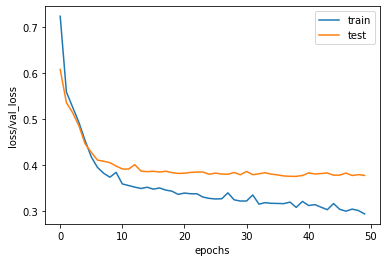

In [261]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss/val_loss")
plt.savefig("Agg_30_loss.png")
plt.show()

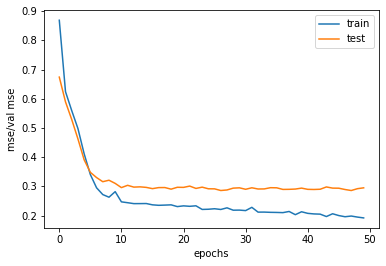

In [262]:
plt.plot(history.history['mse'], label = 'train')
plt.plot(history.history['val_mse'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("mse/val mse")
plt.savefig("Agg_30_mse.png")
plt.show()

In [263]:
y_predicted = classifier.predict(X_test)

In [264]:
y_predicted

array([[-1.1080126 ],
       [-1.4675511 ],
       [-0.12841067],
       ...,
       [ 0.28248894],
       [-0.94222695],
       [-0.3897041 ]], dtype=float32)

In [265]:
#y_predicted = np.argmax(y_predicted, axis = 1)

In [266]:
#y_test = np.argmax(y_test, axis = 1)

In [267]:
test_sum = y_test.sum()*15
test_sum

246.61177006796157

In [268]:
predicted_sum = y_predicted.sum()*15
predicted_sum

731.4741897583008

In [269]:
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score

In [270]:
y_train_predicted = classifier.predict(X_train)
# y_train_predicted = np.argmax(y_train_predicted, axis = 1)
# y_train = np.argmax(y_train, axis = 1)

In [271]:
y_train_predicted

array([[-0.8031964 ],
       [-0.7788506 ],
       [-0.5317053 ],
       ...,
       [-0.80611473],
       [ 1.5763587 ],
       [-0.4260636 ]], dtype=float32)

In [272]:
y_train

array([[-0.93992038],
       [-0.74940733],
       [-0.59353302],
       ...,
       [-0.45497808],
       [ 1.432833  ],
       [-0.54157492]])

In [273]:
cutoff = 0.5                                                      
y_pred_classes_train = np.zeros_like(y_train_predicted)    
y_pred_classes_train[y_train_predicted > cutoff] = 1 

In [274]:
y_train_classes = np.zeros_like(y_train_predicted)
y_train_classes[y_train > cutoff] = 1

In [275]:
confusion_matrix(y_train_classes,y_pred_classes_train)

array([[1690,  105],
       [  92,  514]])

In [276]:
accuracy_score(y_train_classes,y_pred_classes_train)

0.9179508538109121

In [277]:
f1_score(y_train_classes,y_pred_classes_train)

0.8391836734693877

In [278]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_predicted)

0.1939839898229123

In [279]:
mean_absolute_error(y_train, y_train_predicted)

0.29185608048422007

In [280]:
mean_absolute_error(y_test, y_predicted)

0.3774499981189402

In [281]:
rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))

mae = mean_absolute_error(y_train, y_train_predicted)


# r_s = r2_score(predict_y,y_auxHeat)
r_s = r2_score(y_train, y_train_predicted)

print(rmse,mae,r_s)

0.4404361359186054 0.29185608048422007 0.8027636953003705


In [282]:
cutoff = 0.5                                                      
y_pred_classes = np.zeros_like(y_predicted)    
y_pred_classes[y_predicted > cutoff] = 1  

In [283]:
y_test_classes = np.zeros_like(y_predicted)
y_test_classes[y_test > cutoff] = 1

In [284]:
confusion_matrix(y_test_classes, y_pred_classes)

array([[685,  60],
       [ 59, 225]])

In [285]:
accuracy_score(y_test_classes, y_pred_classes)


0.8843537414965986

In [286]:
f1_score(y_test_classes, y_pred_classes)

0.7908611599297012

In [287]:
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

mae = mean_absolute_error(y_test, y_predicted)


# r_s = r2_score(predict_y,y_auxHeat)
r_s = r2_score(y_test, y_predicted)

print(rmse,mae,r_s)

0.5430292803219117 0.3774499981189402 0.7186667071098176


In [114]:
mean_squared_error(y_test, y_predicted)

0.26951020763936173

In [115]:
#Cross Validation

In [116]:
from sklearn.model_selection import cross_validate, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [108]:
df = house_data

In [109]:
df.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,1,1,0,69.016667,65.600000,33.3,93.0,38.466667,60.00,960.0,1_1_0
1,1,1,1,68.566667,65.600000,33.4,91.8,38.233333,63.75,1500.0,1_1_1
2,1,1,2,68.166667,65.600000,32.9,89.4,37.700000,76.50,2475.0,1_1_2
3,1,1,3,68.000000,65.600000,31.1,87.0,37.516667,88.25,3045.0,1_1_3
4,1,1,4,67.866667,65.616667,29.8,83.6,36.950000,112.25,4515.0,1_1_4


In [110]:
y_auxHeat = df[['auxHeat1']].to_numpy()
# oe = OrdinalEncoder()
# y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))

In [111]:
reframed = series_to_supervised(s, 6, 1)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var1(t-5),var2(t-5),...,var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
6,0.320399,-0.913596,0.173717,1.638857,0.729814,-1.862050,960.0,1_1_0,-0.036334,-0.913596,...,6855.0,1_1_5,0.161851,-0.198943,-0.151102,0.432217,0.493934,0.097989,6615.0,1_1_6
7,-0.036334,-0.913596,0.181837,1.543596,0.697438,-1.759965,1500.0,1_1_1,-0.353430,-0.913596,...,6615.0,1_1_6,0.320399,0.295139,-0.159223,0.297264,0.440745,-0.718694,8145.0,1_1_7
8,-0.353430,-0.913596,0.141235,1.353074,0.623437,-1.412874,2475.0,1_1_2,-0.485554,-0.913596,...,8145.0,1_1_7,0.571434,0.206910,-0.183584,0.329018,0.378306,-1.167870,4965.0,1_1_8
9,-0.485554,-0.913596,-0.004934,1.162552,0.597998,-1.093007,3045.0,1_1_3,-0.591253,-0.904773,...,4965.0,1_1_8,0.293975,-0.481275,-0.289151,0.321079,0.343618,-0.841196,3465.0,1_1_9
10,-0.591253,-0.904773,-0.110500,0.892646,0.519372,-0.439661,4515.0,1_1_4,-0.525191,-0.807722,...,3465.0,1_1_9,0.545009,0.595117,-0.256669,0.249633,0.394494,-1.365235,4125.0,1_1_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.318197,0.621586,0.074918,1.175783,0.586050,1.098425,2790.0,12_31_13,0.219105,0.621586,...,3750.0,12_31_18,1.022856,0.283375,0.007247,0.673016,0.466568,1.053054,5325.0,12_31_19
4427,0.219105,0.621586,-0.013054,0.937630,0.522455,1.699594,3900.0,12_31_14,0.164053,0.643643,...,5325.0,12_31_19,1.243062,0.268670,-0.060424,0.725939,0.611103,0.695755,240.0,12_31_20
4428,0.164053,0.643643,0.054616,0.421633,0.549435,0.905597,2670.0,12_31_15,0.417290,1.327417,...,240.0,12_31_20,0.835681,0.246613,-0.134861,0.467940,0.564852,-0.024514,3090.0,12_31_21
4429,0.417290,1.327417,0.122287,0.302556,0.481985,1.285582,9120.0,12_31_16,1.055887,1.489169,...,3090.0,12_31_21,0.868712,-0.275408,-0.094259,0.249633,0.547508,0.673070,930.0,12_31_22


In [112]:
reframed = reframed.drop(['var8(t-6)','var8(t-5)','var8(t-4)','var8(t-3)','var8(t-2)','var8(t-1)'], axis=1)

In [113]:
df_merge  = pd.merge(left=reframed, right=weather_scalar_data, left_on=['var8(t)'],right_on=['combined'],how='left')

In [114]:
new_data=df_merge.drop(columns=['combined'])
new_data

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var1(t-5),var2(t-5),var3(t-5),...,var8(t),Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill
0,0.320399,-0.913596,0.173717,1.638857,0.729814,-1.862050,960.0,-0.036334,-0.913596,0.181837,...,1_1_6,0.090097,0.44685,1.066551,1.363452,1.724502,0.500385,-0.907114,-1.877936,-0.462542
1,-0.036334,-0.913596,0.181837,1.543596,0.697438,-1.759965,1500.0,-0.353430,-0.913596,0.141235,...,1_1_7,0.050698,0.360681,0.859373,1.363452,0.815838,0.500385,-0.624161,-1.877936,-0.462542
2,-0.353430,-0.913596,0.141235,1.353074,0.623437,-1.412874,2475.0,-0.485554,-0.913596,-0.004934,...,1_1_8,0.024431,0.274513,0.721255,1.265486,0.9168,0.500385,-0.297676,-1.877936,-0.462542
3,-0.485554,-0.913596,-0.004934,1.162552,0.597998,-1.093007,3045.0,-0.591253,-0.904773,-0.110500,...,1_1_9,-0.054368,0.151415,0.514077,1.461418,0.311024,0.500385,-0.014722,-1.877936,-0.462542
4,-0.591253,-0.904773,-0.110500,0.892646,0.519372,-0.439661,4515.0,-0.525191,-0.807722,-0.126741,...,1_1_10,-0.120034,0.040626,0.306899,1.363452,1.118726,0.500385,0.061458,-1.877936,0.429985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,0.318197,0.621586,0.074918,1.175783,0.586050,1.098425,2790.0,0.219105,0.621586,-0.013054,...,12_31_19,-0.2251,0.016007,0.583136,0.481761,0.311024,0.500385,-1.799507,-0.685953,0.251479
4421,0.219105,0.621586,-0.013054,0.937630,0.522455,1.699594,3900.0,0.164053,0.643643,0.054616,...,12_31_20,-0.251366,-0.033233,0.514077,0.481761,0.210061,0.500385,-1.755975,-0.685953,0.251479
4422,0.164053,0.643643,0.054616,0.421633,0.549435,0.905597,2670.0,0.417290,1.327417,0.122287,...,12_31_21,-0.264499,-0.070162,0.445017,0.579727,0.613912,0.500385,-1.745093,-0.685953,0.251479
4423,0.417290,1.327417,0.122287,0.302556,0.481985,1.285582,9120.0,1.055887,1.489169,0.095219,...,12_31_22,-0.317032,-0.070162,0.583136,0.481761,0.008136,0.500385,-1.701561,-0.685953,0.251479


In [115]:
y_auxHeat = new_data['var7(t)']
y_auxHeat = to_categorical(y_auxHeat).astype(float)

X = new_data.drop(labels = ['var7(t)'], axis = 1).astype(float)
X.shape, y_auxHeat.shape

((4425, 58), (4425, 15256))

In [116]:
def build_classifier(ac_func):

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = ac_func, input_dim =58))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = ac_func))

    # Adding the output layer
    classifier.add(Dense(units = 15256, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [117]:
ac_funcs = ['relu', 'sigmoid', 'tanh']
ac_funcs_score_time = []
ac_funcs_acc = []
ac_funcs_f1 = []

In [118]:
X = X.astype(float)
y_auxHeat = y_auxHeat.astype(float)

In [119]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[0],  batch_size = 64, nb_epoch = 50)

In [120]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[0],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

7/7 [==============================] - 0s 9ms/step - loss: 8.4579 - accuracy: 0.0000e+00


{'fit_time': array([2.2197938 , 2.21653676, 1.95874691, 1.98777819, 1.97162199,
        1.9702971 , 2.00523496, 2.07729888, 2.00963616, 2.01727295]),
 'score_time': array([0.32531309, 0.29626608, 0.33481598, 0.69633675, 0.31819201,
        0.32110071, 0.30519199, 0.29832816, 0.34188914, 0.28309608]),
 'test_score': array([0.        , 0.        , 0.        , 0.        , 0.00451467,
        0.00226244, 0.        , 0.        , 0.00226244, 0.        ])}

In [121]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [122]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[1],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

7/7 [==============================] - 0s 8ms/step - loss: 8.4347 - accuracy: 0.0045


{'fit_time': array([1.9914701 , 2.07712722, 1.98938179, 2.10510683, 2.57778788,
        1.84653306, 1.73654604, 1.90888   , 1.96853113, 1.98636508]),
 'score_time': array([0.30901003, 0.31147861, 0.33557296, 0.32128429, 0.30088711,
        0.29992986, 0.30497408, 0.31371689, 0.34828091, 0.3182559 ]),
 'test_score': array([0.        , 0.00225734, 0.00225734, 0.00225734, 0.00225734,
        0.00452489, 0.00226244, 0.00226244, 0.        , 0.00452489])}

In [123]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [124]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[2],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

7/7 [==============================] - 0s 9ms/step - loss: 8.1653 - accuracy: 0.0000e+00


{'fit_time': array([1.97071123, 1.93375206, 1.88197684, 1.94148517, 2.05443096,
        2.20287108, 2.67088103, 2.01433516, 2.04378295, 1.92083001]),
 'score_time': array([0.29882407, 0.32027078, 0.29592705, 0.32982612, 0.31535578,
        0.31251383, 0.3179152 , 0.35520482, 0.38340139, 0.36794901]),
 'test_score': array([0.00451467, 0.        , 0.        , 0.        , 0.00451467,
        0.00452489, 0.00904977, 0.        , 0.        , 0.        ])}

In [125]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [126]:
ac_funcs_acc

[array([0.        , 0.        , 0.        , 0.        , 0.00451467,
        0.00226244, 0.        , 0.        , 0.00226244, 0.        ]),
 array([0.        , 0.00225734, 0.00225734, 0.00225734, 0.00225734,
        0.00452489, 0.00226244, 0.00226244, 0.        , 0.00452489]),
 array([0.00451467, 0.        , 0.        , 0.        , 0.00451467,
        0.00452489, 0.00904977, 0.        , 0.        , 0.        ])]

In [127]:
acc_df = pd.DataFrame(ac_funcs_acc)
acc_df = acc_df.T

In [128]:
acc_df = acc_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

In [129]:
acc_df

,ReLu,Sigmoid,Tanh
0,0.000000,0.000000,0.004515
1,0.000000,0.002257,0.000000
2,0.000000,0.002257,0.000000
3,0.000000,0.002257,0.000000
4,0.004515,0.002257,0.004515
5,0.002262,0.004525,0.004525
6,0.000000,0.002262,0.009050
7,0.000000,0.002262,0.000000
8,0.002262,0.000000,0.000000
9,0.000000,0.004525,0.000000


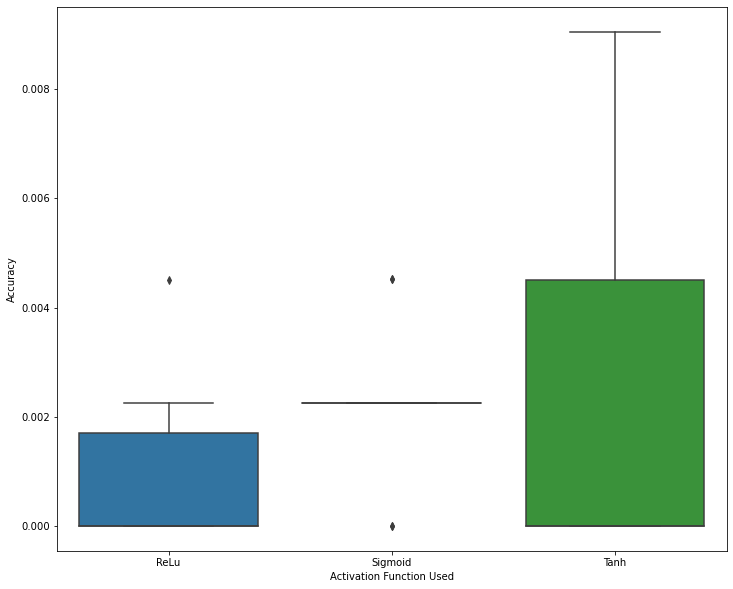

In [130]:
plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = acc_df)
ax.set(ylabel = "Accuracy", xlabel = "Activation Function Used")
plt.savefig("12.png")

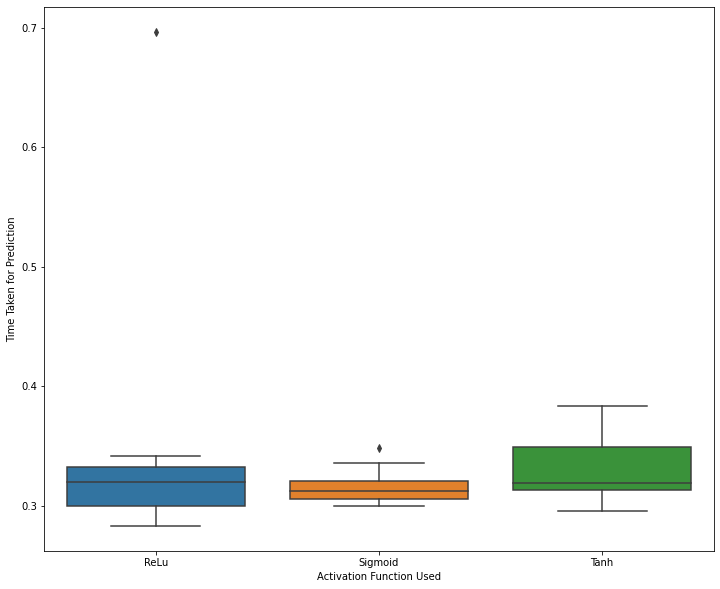

In [131]:
time_df = pd.DataFrame(ac_funcs_score_time)
time_df = time_df.T

time_df = time_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = time_df)
ax.set(ylabel = "Time Taken for Prediction", xlabel = "Activation Function Used")
plt.savefig("14.png")